In [ ]:


import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

17/01/2024


In [ ]:
watson_data=pd.read_csv("/content/watson_healthcare_modified.csv")
watson_data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
watson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [ ]:
watson_data.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
watson_data.dtypes

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

In [ ]:
watson_data.drop("EmployeeID",axis=1,inplace=True)

In [ ]:
watson_data.drop("MaritalStatus",axis=1,inplace=True)

In [ ]:
watson_data.drop("Over18",axis=1,inplace=True)

In [ ]:
watson_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [ ]:
watson_data.OverTime.values

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
def col_unique_value(d):
  for col in d:
    print(col,":",d[col].unique())

In [ ]:
col_unique_value(watson_data)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : [0 1]
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 149

In [ ]:
watson_data_pro=pd.get_dummies(data=watson_data,columns=["BusinessTravel","Department","EducationField","JobRole"])

In [ ]:
watson_data_pro

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist
0,41,0,1102,1,2,1,2,Female,94,3,...,1,0,0,0,0,0,0,1,0,0
1,49,0,279,8,1,1,3,Male,61,2,...,1,0,0,0,0,0,0,0,1,0
2,37,1,1373,2,2,1,4,Male,92,2,...,0,0,0,1,0,0,0,1,0,0
3,33,0,1392,3,4,1,4,Female,56,3,...,1,0,0,0,0,0,0,0,1,0
4,27,0,591,2,1,1,1,Male,40,3,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,471,24,3,1,3,Male,66,1,...,0,0,0,0,1,0,0,1,0,0
1672,46,0,1125,10,3,1,3,Female,94,2,...,0,1,0,0,0,0,0,1,0,0
1673,20,0,959,1,3,1,4,Female,83,2,...,1,0,0,0,0,0,0,0,1,0
1674,39,0,466,1,1,1,4,Female,65,2,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
col_unique_value(watson_data_pro)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : [0 1]
DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452  465  702 1157  602 1480 

In [ ]:
col_to_scale=["Age","Attrition","DailyRate","DistanceFromHome","Education","EmployeeCount","EnvironmentSatisfaction","HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked","OverTime","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","Shift","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","BusinessTravel_Non-Travel","BusinessTravel_Travel_Frequently","BusinessTravel_Travel_Rarely","Department_Cardiology","Department_Maternity","Department_Neurology","EducationField_Human Resources", "EducationField_Life Sciences",
"EducationField_Marketing","EducationField_Medical","EducationField_Other","EducationField_Technical Degree","JobRole_Admin","JobRole_Administrative","JobRole_Nurse","JobRole_Other","JobRole_Therapist"]
scaler=MinMaxScaler()
watson_data_pro[col_to_scale]=scaler.fit_transform(watson_data_pro[col_to_scale])

In [ ]:
watson_data_pro

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist
0,0.547619,0,0.715820,0.000000,0.25,1,0.333333,0,0.914286,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.738095,0,0.126700,0.250000,0.00,1,0.666667,1,0.442857,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,1,0.909807,0.035714,0.25,1,1.000000,1,0.885714,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.357143,0,0.923407,0.071429,0.75,1,1.000000,0,0.371429,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0,0.350036,0.035714,0.00,1,0.000000,1,0.142857,0.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,0.190476,1,0.264137,0.821429,0.50,1,0.666667,1,0.514286,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1672,0.666667,0,0.732283,0.321429,0.50,1,0.666667,0,0.914286,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1673,0.047619,0,0.613457,0.000000,0.50,1,1.000000,0,0.757143,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1674,0.500000,0,0.260558,0.000000,0.00,1,1.000000,0,0.500000,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
col_unique_value(watson_data_pro)

Age : [0.54761905 0.73809524 0.45238095 0.35714286 0.21428571 0.33333333
 0.97619048 0.28571429 0.47619048 0.42857143 0.4047619  0.26190476
 0.30952381 0.38095238 0.23809524 0.0952381  0.83333333 0.14285714
 0.07142857 0.57142857 0.61904762 0.66666667 0.5        0.5952381
 0.76190476 0.19047619 0.71428571 0.88095238 0.64285714 0.9047619
 0.11904762 0.78571429 0.52380952 0.85714286 0.95238095 0.04761905
 0.16666667 0.02380952 0.92857143 0.80952381 0.69047619 0.
 1.        ]
Attrition : [0 1]
DailyRate : [7.15819613e-01 1.26700072e-01 9.09806729e-01 9.23407301e-01
 3.50035791e-01 6.46385111e-01 8.74731568e-01 8.99069435e-01
 8.16034359e-02 8.56836077e-01 5.06084467e-01 3.65068003e-02
 4.06585540e-01 8.90479599e-01 7.15819613e-04 9.21259843e-01
 1.66070150e-01 7.30851825e-01 7.99570508e-01 1.92555476e-01
 4.08732999e-01 7.98854689e-01 2.26914817e-01 2.06871868e-01
 4.27344309e-01 8.44667144e-01 7.32283465e-01 4.21617752e-01
 2.68432355e-01 4.31639227e-01 5.88403722e-01 9.71367215e-01
 1.6

In [ ]:
yes_no_col=["Attrition","OverTime","Gender"]

for i in yes_no_col:
  watson_data_pro[i].replace({"Yes":1,"No":0},inplace=True)
  watson_data_pro[i].replace({'Female':0,'Male':1},inplace=True)

In [ ]:
col_unique_value(watson_data_pro)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : [0 1]
DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452  465  702 1157  602 1480 

In [ ]:
watson_data_pro.dtypes

Age                                 float64
Attrition                           float64
DailyRate                           float64
DistanceFromHome                    float64
Education                           float64
EmployeeCount                       float64
EnvironmentSatisfaction             float64
Gender                                int64
HourlyRate                          float64
JobInvolvement                      float64
JobLevel                            float64
JobSatisfaction                     float64
MonthlyIncome                       float64
MonthlyRate                         float64
NumCompaniesWorked                  float64
OverTime                            float64
PercentSalaryHike                   float64
PerformanceRating                   float64
RelationshipSatisfaction            float64
StandardHours                       float64
Shift                               float64
TotalWorkingYears                   float64
TrainingTimesLastYear           

In [ ]:
X=watson_data_pro.drop("Attrition",axis="columns")
y=watson_data_pro["Attrition"]

X=pd.get_dummies(X)
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist
0,0.547619,0.715820,0.000000,0.25,0.0,0.333333,0,0.914286,0.666667,0.25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.738095,0.126700,0.250000,0.00,0.0,0.666667,1,0.442857,0.333333,0.25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,0.0,1.000000,1,0.885714,0.333333,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.357143,0.923407,0.071429,0.75,0.0,1.000000,0,0.371429,0.666667,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.0,0.000000,1,0.142857,0.666667,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,0.190476,0.264137,0.821429,0.50,0.0,0.666667,1,0.514286,0.000000,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1672,0.666667,0.732283,0.321429,0.50,0.0,0.666667,0,0.914286,0.333333,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1673,0.047619,0.613457,0.000000,0.50,0.0,1.000000,0,0.757143,0.333333,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1674,0.500000,0.260558,0.000000,0.00,0.0,1.000000,0,0.500000,0.333333,0.75,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection  import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1340, 44), (336, 44), (1340,), (336,))

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1,input_shape=(44,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros')])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
42/42 [==============================] - 0s 1ms/step - loss: 11.9318 - accuracy: 0.1134
Epoch 2/100
42/42 [==============================] - 0s 1ms/step - loss: 11.3924 - accuracy: 0.1134
Epoch 3/100
42/42 [==============================] - 0s 1ms/step - loss: 10.8550 - accuracy: 0.1134
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 10.3169 - accuracy: 0.1134
Epoch 5/100
42/42 [==============================] - 0s 1ms/step - loss: 9.7788 - accuracy: 0.1134
Epoch 6/100
42/42 [==============================] - 0s 1ms/step - loss: 9.2406 - accuracy: 0.1134
Epoch 7/100
42/42 [==============================] - 0s 1ms/step - loss: 8.7024 - accuracy: 0.1134
Epoch 8/100
42/42 [==============================] - 0s 1ms/step - loss: 8.1648 - accuracy: 0.1134
Epoch 9/100
42/42 [==============================] - 0s 1ms/step - loss: 7.6258 - accuracy: 0.1134
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: 7.0887 - accuracy: 0.1134
Epoch

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1,input_shape=(44,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros')])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(X_test,y_test,epochs=100)

Epoch 1/100
11/11 [==============================] - 0s 2ms/step - loss: 11.7135 - accuracy: 0.1399
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 11.5763 - accuracy: 0.1399
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 11.4413 - accuracy: 0.1399
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 11.3061 - accuracy: 0.1399
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 11.1684 - accuracy: 0.1399
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 11.0340 - accuracy: 0.1399
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 10.8978 - accuracy: 0.1399
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 10.7617 - accuracy: 0.1399
Epoch 9/100
11/11 [==============================] - 0s 1ms/step - loss: 10.6250 - accuracy: 0.1399
Epoch 10/100
11/11 [==============================] - 0s 1ms/step - loss: 10.4896 - accuracy: 0.1399

In [ ]:
model.get_weights()

[array([[-3.0485532 ],
        [-0.3416163 ],
        [ 1.9381663 ],
        [ 0.17330186],
        [ 1.        ],
        [-1.1637648 ],
        [-0.15824541],
        [-0.38571405],
        [-2.0476627 ],
        [-1.5814852 ],
        [-0.89034325],
        [-1.244294  ],
        [ 0.492273  ],
        [ 1.5724518 ],
        [ 3.2552419 ],
        [ 0.2413449 ],
        [ 0.12664849],
        [-0.38599283],
        [ 1.        ],
        [-2.3743017 ],
        [-2.8380768 ],
        [-0.33542812],
        [-1.1987952 ],
        [-2.7008224 ],
        [-2.2508707 ],
        [ 1.6084784 ],
        [-1.46916   ],
        [ 0.14791106],
        [ 1.3964523 ],
        [ 0.3198234 ],
        [ 1.0080211 ],
        [ 0.2822802 ],
        [ 0.21906514],
        [ 1.3462104 ],
        [ 0.30467555],
        [ 0.77091295],
        [ 0.1777528 ],
        [ 0.148253  ],
        [ 0.9211661 ],
        [-1.9720106 ],
        [-3.2559044 ],
        [ 1.0355216 ],
        [ 0.75858605],
        [-0

In [ ]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.8601


[0.3175623416900635, 0.8601190447807312]

In [ ]:
y_test_pre1=model.predict(X_test)

11/11 [==============================] - 0s 1ms/step


In [ ]:
y_test_label1=[np.argmax(i) for i in y_test_pre1]
y_test_label1=np.array(y_test_label1)

In [ ]:
y_test_label1.shape

(336,)

In [ ]:
cm1=tf.math.confusion_matrix(y_test,y_test_label1)
type(cm1)

tensorflow.python.framework.ops.EagerTensor

<Axes: >

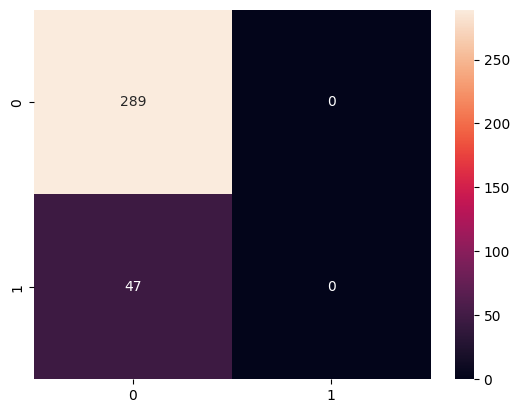

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d")